In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [12]:
df = pd.read_csv("Customers.csv")

In [13]:
columns = [
    'CustomerID', 'Title', 'FirstName', 'LastName', 'DOB', 'Gender1', 'Gender2',
    'Email', 'ZipCode', 'Children', 'Education', 'Occupation', 'Status'
]
df.columns = columns


In [14]:
df = df.drop(columns=['CustomerID', 'Email', 'FirstName', 'LastName'])

In [15]:
df['Children'] = pd.to_numeric(df['Children'], errors='coerce')
df['ZipCode'] = pd.to_numeric(df['ZipCode'], errors='coerce')

In [16]:
df = df.dropna()


In [17]:
df = df.drop_duplicates()

In [18]:
df['Status'] = df['Status'].map({'Y': 1, 'N': 0})


In [19]:
categorical_cols = ['Title', 'Gender1', 'Gender2', 'Education', 'Occupation']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


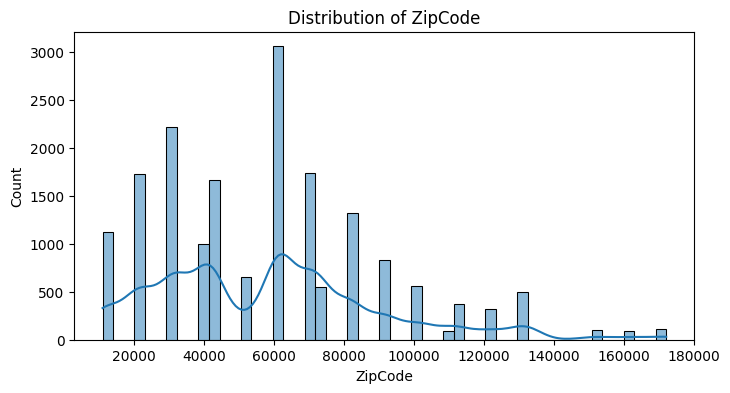

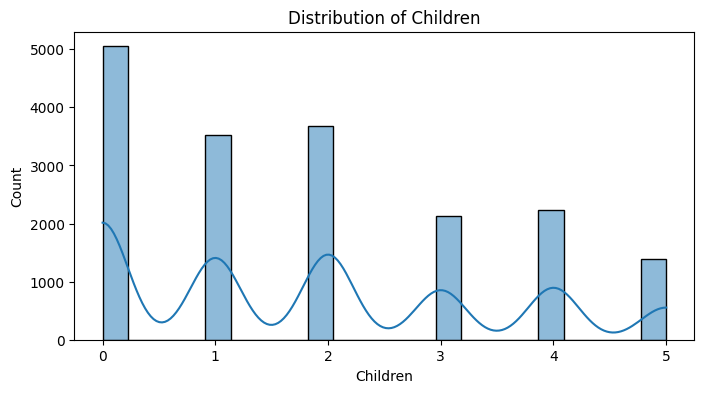

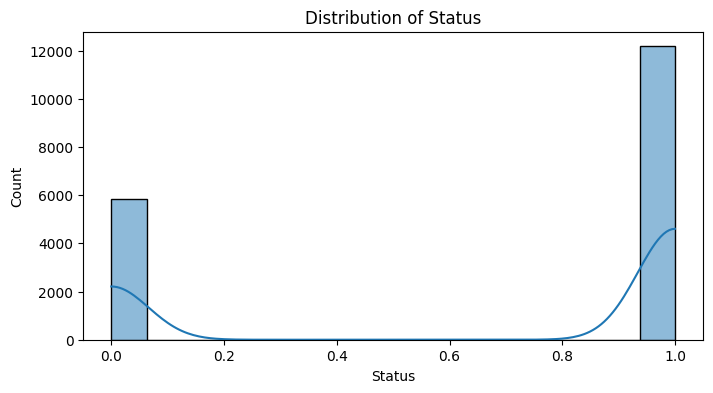

In [20]:
# Identify numerical features
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

# Histograms
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


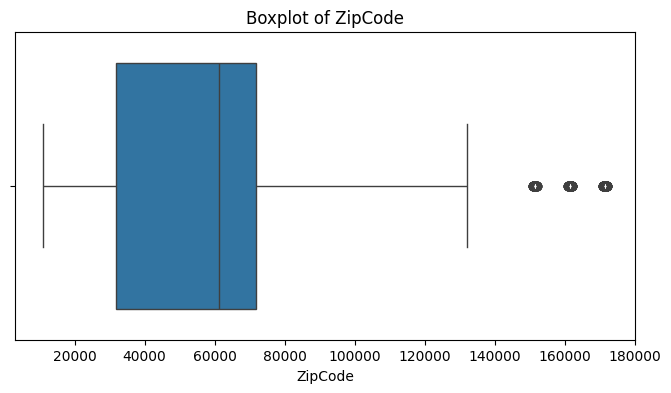

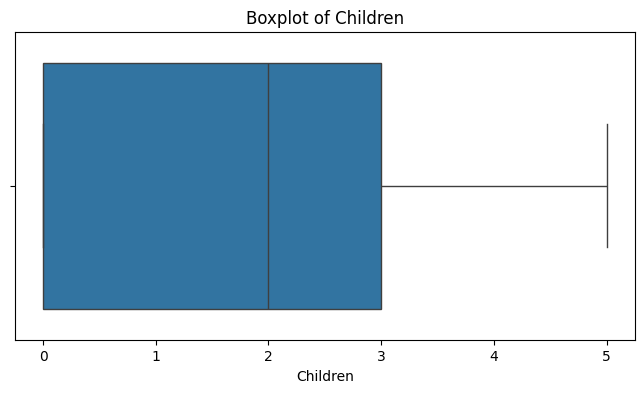

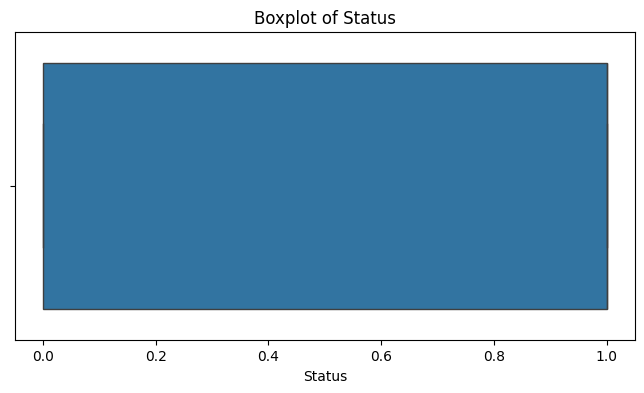

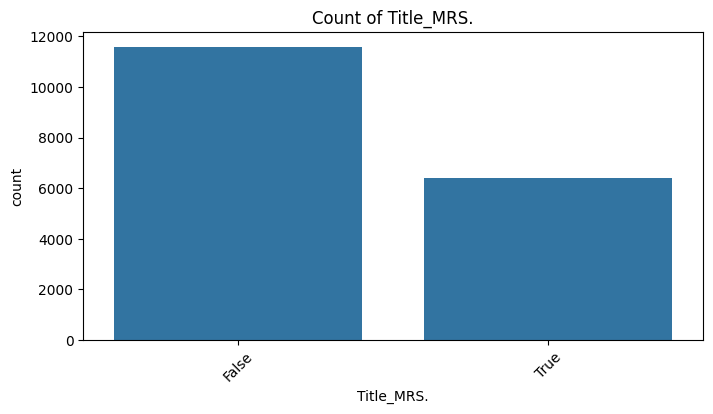

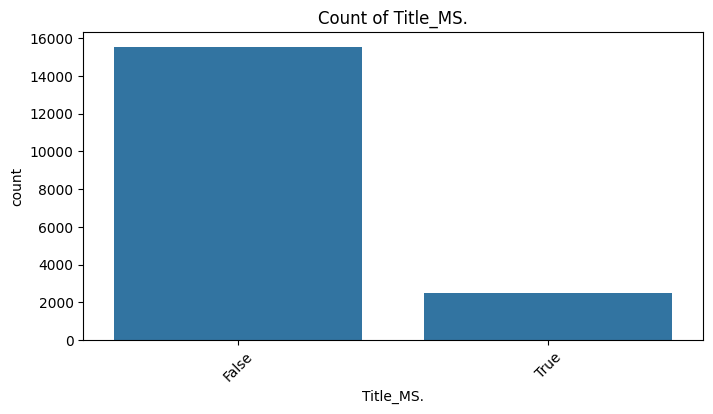

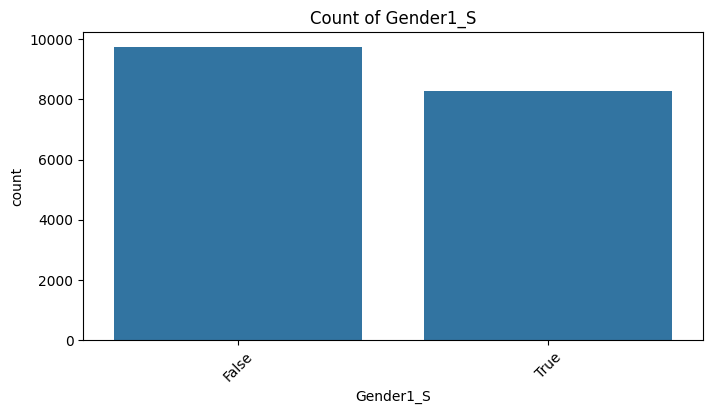

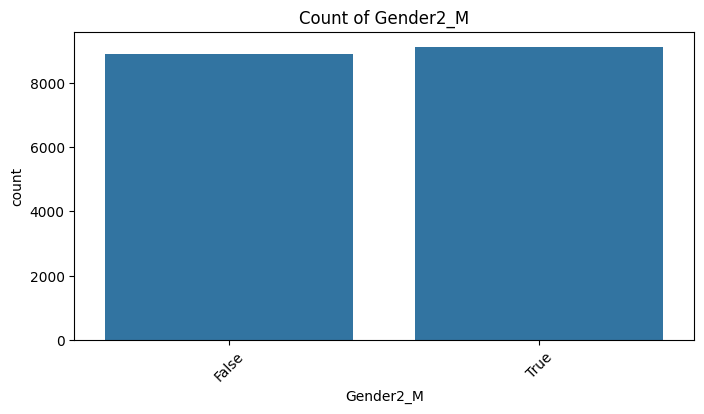

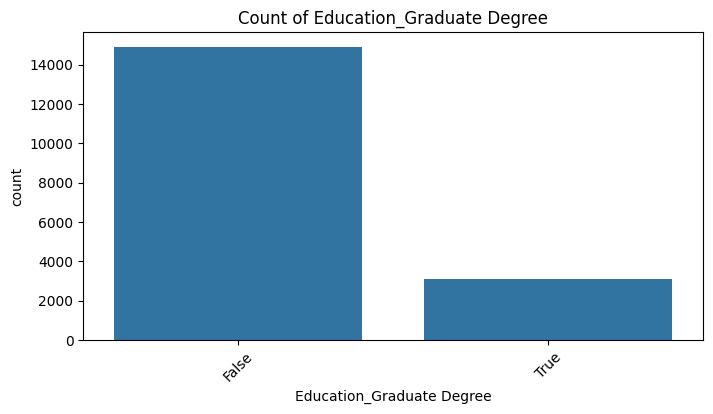

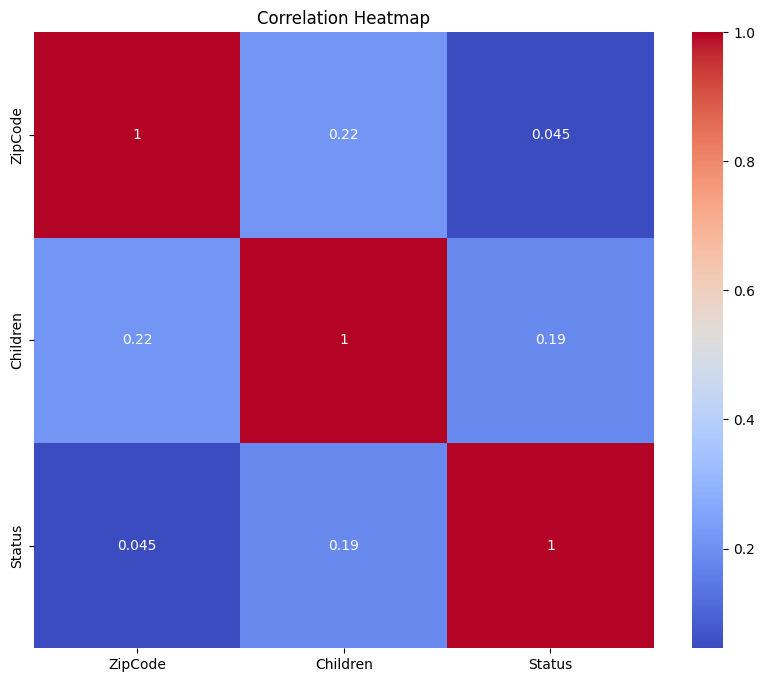

In [21]:
# Boxplots
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Categorical Features
categorical_features = df.filter(like='_', axis=1).columns  # encoded dummies

# Bar Charts
for col in categorical_features[:5]:  # limit to avoid too many plots
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
import pandas as pd
from datetime import datetime

# Convert DOB to datetime
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')

# Calculate age based on today's date
current_year = datetime.today().year
df['Age'] = current_year - df['DOB'].dt.year

# Drop original DOB column
df = df.drop(columns=['DOB'])

In [25]:
from sklearn.preprocessing import StandardScaler

# Define X and y again after updating df
X = df.drop('Status', axis=1)
y = df['Status']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Define X and y
X = df.drop('Status', axis=1)
y = df['Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}



--- Untuned Models ---
Logistic Regression - Accuracy: 0.7267, F1 Score: 0.8126


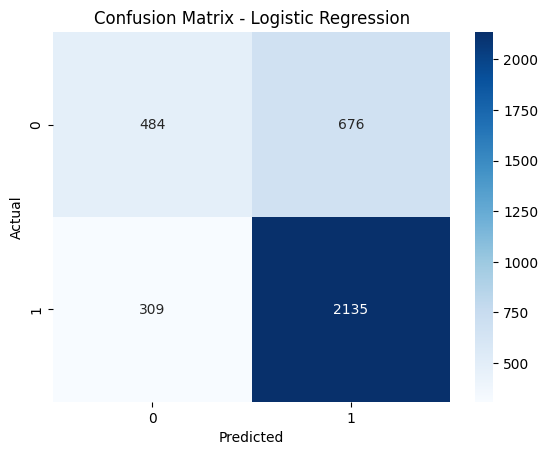

              precision    recall  f1-score   support

           0       0.61      0.42      0.50      1160
           1       0.76      0.87      0.81      2444

    accuracy                           0.73      3604
   macro avg       0.68      0.65      0.65      3604
weighted avg       0.71      0.73      0.71      3604

Decision Tree - Accuracy: 0.6862, F1 Score: 0.7691


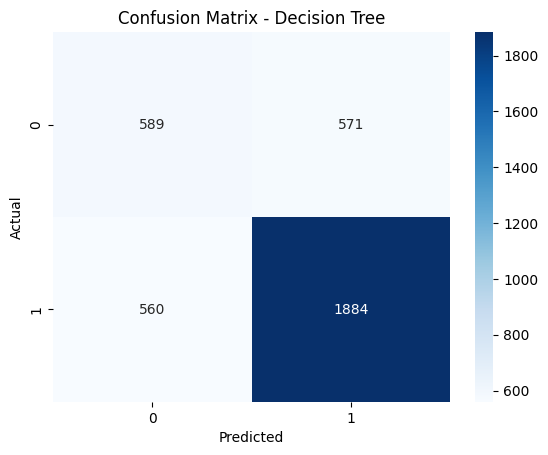

              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1160
           1       0.77      0.77      0.77      2444

    accuracy                           0.69      3604
   macro avg       0.64      0.64      0.64      3604
weighted avg       0.69      0.69      0.69      3604

Random Forest - Accuracy: 0.7203, F1 Score: 0.7979


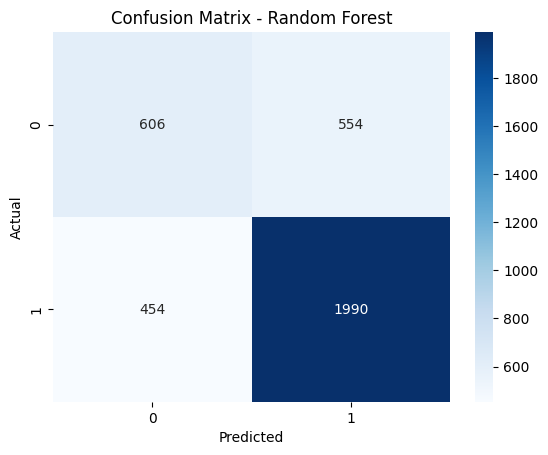

              precision    recall  f1-score   support

           0       0.57      0.52      0.55      1160
           1       0.78      0.81      0.80      2444

    accuracy                           0.72      3604
   macro avg       0.68      0.67      0.67      3604
weighted avg       0.71      0.72      0.72      3604



In [28]:
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{name} - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print(classification_report(y_true, y_pred))

print("\n--- Untuned Models ---")
untuned_results = {}

for name, model in models.items():
    if 'Logistic' in name:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    untuned_results[name] = (accuracy_score(y_test, y_pred), f1_score(y_test, y_pred))
    evaluate_model(name, y_test, y_pred)


=== 5. Performance Comparison ===
              Model  Untuned Accuracy  Untuned F1  Tuned Accuracy  Tuned F1
Logistic Regression          0.726693    0.812559        0.726415  0.812476
      Decision Tree          0.686182    0.769137        0.744728  0.824695
      Random Forest          0.720311    0.797915        0.740844  0.826394


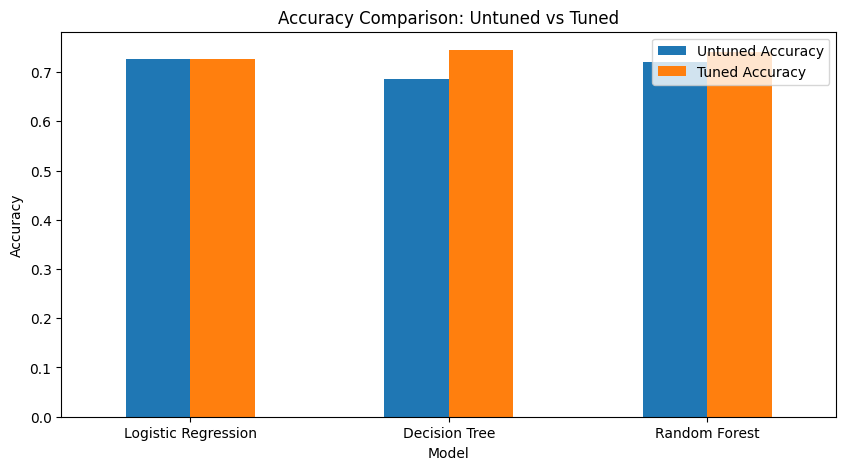

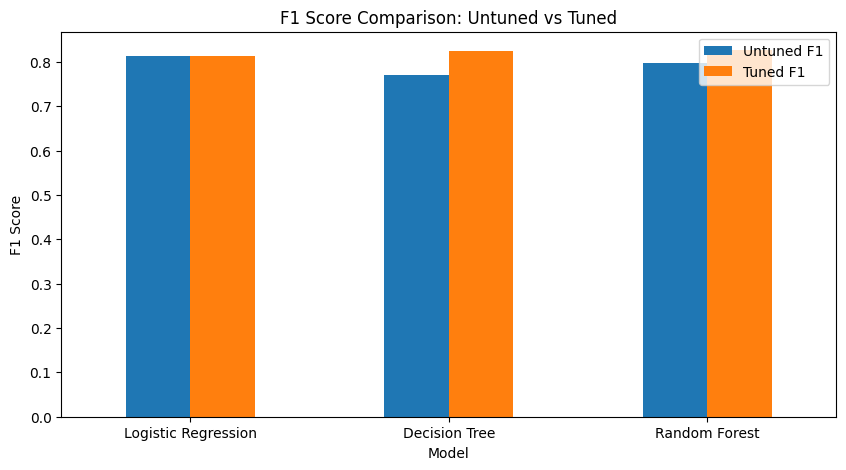

In [30]:
# 5. PERFORMANCE COMPARISON
# ----------------------
print("\n=== 5. Performance Comparison ===")

comparison = []
for name in models.keys():
    u_acc, u_f1 = untuned_results[name]
    t_acc, t_f1 = tuned_results[name]
    comparison.append([name, u_acc, u_f1, t_acc, t_f1])

comparison_df = pd.DataFrame(comparison, columns=[
    'Model', 'Untuned Accuracy', 'Untuned F1', 'Tuned Accuracy', 'Tuned F1'
])
print(comparison_df.to_string(index=False))

# Plot comparison
comparison_df.set_index('Model')[['Untuned Accuracy', 'Tuned Accuracy']].plot(kind='bar', figsize=(10, 5))
plt.title('Accuracy Comparison: Untuned vs Tuned')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)
plt.show()

comparison_df.set_index('Model')[['Untuned F1', 'Tuned F1']].plot(kind='bar', figsize=(10, 5))
plt.title('F1 Score Comparison: Untuned vs Tuned')
plt.ylabel('F1 Score')
plt.xticks(rotation=0)
plt.show()
